In [1]:
import tensorflow as tf

In [3]:
tf.__version__, tf.keras.__version__

('2.4.1', '2.4.0')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, Sequential

In [6]:
gpus= tf.config.experimental.list_physical_devices('GPU')
gpus

[]

In [6]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train),(X_test, y_test) = cifar10.load_data()

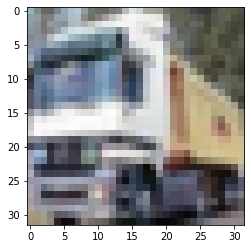

In [10]:
plt.imshow(X_train[1])


In [12]:
y_train[1]

array([9], dtype=uint8)

In [10]:
X_train.shape,  y_train.shape,X_test.shape, y_test.shape 

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
# change datatype into flat.32，decentralization

In [14]:
X_train, X_test = tf.cast(X_train, dtype= tf.float32)/255.0, tf.cast(X_test, dtype=tf.float32)/255.0
y_train, y_test = tf.cast(y_train, dtype= tf.float32)/255.0, tf.cast(y_test, dtype=tf.float32)/255.0

In [15]:
X_train.shape,  y_train.shape,X_test.shape, y_test.shape 

(TensorShape([50000, 32, 32, 3]),
 TensorShape([50000, 1]),
 TensorShape([10000, 32, 32, 3]),
 TensorShape([10000, 1]))

In [24]:
model = Sequential([
    # feature engineering, set 2 layers 
    
    # unit1 
    
    layers.Conv2D(16, kernel_size = (3,3), padding = 'same', activation= tf.nn.relu, input_shape=X_train.shape[1:]),
    layers.Conv2D(16, kernel_size = (3,3), padding = 'same', activation= tf.nn.relu),
    layers.MaxPool2D(pool_size=(2,2)),
    
    # unit2
    layers.Conv2D(32, kernel_size = (3,3), padding = 'same', activation= tf.nn.relu),
    layers.Conv2D(32, kernel_size = (3,3), padding = 'same', activation= tf.nn.relu),
    layers.MaxPool2D(pool_size=(2,2)),
    
    # data preparation
    # unit 3
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [30]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics = ['sparse_categorical_accuracy'])

In [31]:
model.fit(X_train,y_train,batch_size=64,epochs=5,validation_split=0.2)

Epoch 1/5
625/625 [==============================] - 55s 87ms/step - loss: 0.0435 - sparse_categorical_accuracy: 0.0988 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.1014
Epoch 2/5
625/625 [==============================] - 73s 117ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0997 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.1014
Epoch 3/5
625/625 [==============================] - 71s 114ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0972 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.1014
Epoch 4/5
625/625 [==============================] - 72s 116ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0969 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.1014
Epoch 5/5
625/625 [==============================] - 67s 107ms/step - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.0998 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 0.1014


In [32]:
model.evaluate(X_test,y_test, verbose=2)

313/313 - 2s - loss: 0.0000e+00 - sparse_categorical_accuracy: 0.1000


[0.0, 0.10000000149011612]

In [33]:
model.save('CNN_1O.h5')

In [3]:
model_reload = tf.keras.models.load_model('CNN_1O.h5')

In [4]:
model_reload.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 16)        448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0

In [16]:
# try dropout, early stopping and batchnormoalization

In [ ]:
from tensorflow.keras.layers import Dropout
from tf.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping